## Getting Our Data Ready

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

C:\Users\bishw\OneDrive\Desktop\Insurance\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
data = pd.read_csv('Data Cleaned Insurance.csv')
data.head()

,age,Sex,bmi,children,Smoker,Region,charges
0,19,0,27.900,0.0,1,0,16884.92400
1,18,1,33.770,1.0,0,1,1725.55230
2,28,1,33.000,3.0,0,1,4449.46200
3,33,1,22.705,0.0,0,2,21984.47061
4,32,1,28.880,0.0,0,2,3866.85520


## Importing Dependencies

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge

### Train test Split

In [6]:
X = data.drop(['charges'],axis=1)
y = data['charges']
X.shape , y.shape

((1338, 6), (1338,))

In [37]:
# set random seed
np.random.seed(40)
X_train,X_test , y_train,y_test = train_test_split(X,
                                                  y,
                                                  train_size=0.4) 

In [38]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((535, 6), (803, 6), (535,), (803,))

## Standarzation

In [40]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
prams = {'age':data['age'],
        'bmi':data['bmi'],
        'Region':data['Region']}
X_train_scaled = scale.fit_transform(X_train,prams)
X_test_scaled = scale.fit_transform(X_test,prams)

## Modeling

### RandomForest

In [41]:

rfr = RandomForestRegressor()
# fit the model to the data
rfr.fit(X_train_scaled,y_train)


RandomForestRegressor()

In [42]:
randomforest_score= rfr.score(X_test_scaled,y_test)
randomforest_score

0.8155508916219343

### LinearRegression

In [43]:
reg = LinearRegression()
reg.fit(X_train_scaled,y_train)

LinearRegression()

In [44]:
reg_score = reg.score(X_test_scaled,y_test)
reg_score

0.7372581126857631

### Ridge

In [45]:
rdg = Ridge()
rdg.fit(X_train_scaled,y_train)

Ridge()

In [46]:
rdg_score = rdg.score(X_train_scaled,y_train)
rdg_score

0.7552959700386281

## Comparison

In [47]:
model_scores = {'RandomForestScore':randomforest_score,
                'LinearRegression':reg_score,
                'Ridge':rdg_score
               }

In [48]:
df_model_score = pd.DataFrame([model_scores])

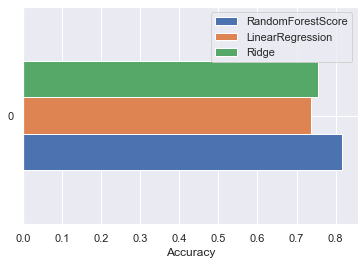

In [49]:
df_model_score.plot.barh();
plt.xlabel('Accuracy');


## **HyperParameter Tunning**
`RandomizedSearchCV` **And** `GridSearchCV`

In [19]:
from sklearn.model_selection import RandomizedSearchCV
rfr_grid = {
    'n_estimators':np.arange(10,1000,50),
    'criterion':['squared_error', 'absolute_error', 'poisson'],
    'max_depth':[None,5,8,10],
    'max_features':[ 'sqrt', 'log2', None]
}

In [21]:
# setup hyperparametes for RandomForestRegressor 
rfr_rcv = RandomizedSearchCV(RandomForestRegressor(),
                                param_distributions= rfr_grid,
                                n_iter = 50,
                                verbose=2,
                                cv=5)
# fit random hyperparameter search model for linearRegression
rfr_rcv.fit(X_train_scaled,y_train)
                                

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END criterion=absolute_error, max_depth=None, max_features=sqrt, n_estimators=310; total time=   0.6s
[CV] END criterion=absolute_error, max_depth=None, max_features=sqrt, n_estimators=310; total time=   0.9s
[CV] END criterion=absolute_error, max_depth=None, max_features=sqrt, n_estimators=310; total time=   0.7s
[CV] END criterion=absolute_error, max_depth=None, max_features=sqrt, n_estimators=310; total time=   0.7s
[CV] END criterion=absolute_error, max_depth=None, max_features=sqrt, n_estimators=310; total time=   0.8s
[CV] END criterion=absolute_error, max_depth=10, max_features=log2, n_estimators=210; total time=   0.5s
[CV] END criterion=absolute_error, max_depth=10, max_features=log2, n_estimators=210; total time=   0.4s
[CV] END criterion=absolute_error, max_depth=10, max_features=log2, n_estimators=210; total time=   0.4s
[CV] END criterion=absolute_error, max_depth=10, max_features=log2, n_estimators=210; to

[CV] END criterion=squared_error, max_depth=None, max_features=sqrt, n_estimators=210; total time=   0.1s
[CV] END criterion=poisson, max_depth=8, max_features=None, n_estimators=610; total time=   0.7s
[CV] END criterion=poisson, max_depth=8, max_features=None, n_estimators=610; total time=   0.8s
[CV] END criterion=poisson, max_depth=8, max_features=None, n_estimators=610; total time=   0.8s
[CV] END criterion=poisson, max_depth=8, max_features=None, n_estimators=610; total time=   0.8s
[CV] END criterion=poisson, max_depth=8, max_features=None, n_estimators=610; total time=   0.8s
[CV] END criterion=squared_error, max_depth=8, max_features=None, n_estimators=560; total time=   0.6s
[CV] END criterion=squared_error, max_depth=8, max_features=None, n_estimators=560; total time=   0.7s
[CV] END criterion=squared_error, max_depth=8, max_features=None, n_estimators=560; total time=   0.7s
[CV] END criterion=squared_error, max_depth=8, max_features=None, n_estimators=560; total time=   0.

[CV] END criterion=poisson, max_depth=10, max_features=sqrt, n_estimators=860; total time=   0.9s
[CV] END criterion=poisson, max_depth=None, max_features=log2, n_estimators=960; total time=   1.2s
[CV] END criterion=poisson, max_depth=None, max_features=log2, n_estimators=960; total time=   1.2s
[CV] END criterion=poisson, max_depth=None, max_features=log2, n_estimators=960; total time=   1.1s
[CV] END criterion=poisson, max_depth=None, max_features=log2, n_estimators=960; total time=   0.9s
[CV] END criterion=poisson, max_depth=None, max_features=log2, n_estimators=960; total time=   0.9s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, n_estimators=810; total time=   1.2s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, n_estimators=810; total time=   1.4s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, n_estimators=810; total time=   1.4s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, n_estimators=810; total

[CV] END criterion=absolute_error, max_depth=None, max_features=log2, n_estimators=260; total time=   0.7s
[CV] END criterion=absolute_error, max_depth=None, max_features=log2, n_estimators=260; total time=   0.6s
[CV] END criterion=absolute_error, max_depth=None, max_features=log2, n_estimators=260; total time=   0.6s
[CV] END criterion=absolute_error, max_depth=None, max_features=log2, n_estimators=260; total time=   0.6s
[CV] END criterion=poisson, max_depth=None, max_features=None, n_estimators=560; total time=   0.9s
[CV] END criterion=poisson, max_depth=None, max_features=None, n_estimators=560; total time=   0.8s
[CV] END criterion=poisson, max_depth=None, max_features=None, n_estimators=560; total time=   0.7s
[CV] END criterion=poisson, max_depth=None, max_features=None, n_estimators=560; total time=   0.8s
[CV] END criterion=poisson, max_depth=None, max_features=None, n_estimators=560; total time=   0.8s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [None, 5, 8, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [50]:
rfr_rcv.best_params_

{'n_estimators': 610,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'absolute_error'}

In [51]:
rfr_tuned_score = rfr_rcv.score(X_test_scaled,y_test)
rfr_tuned_score

0.8198196306778496

In [ ]:
# linear regression
